In [1]:
import pandas as pd

dfR1 = pd.read_excel("Data/riket2023_åk9_np.xlsx", skiprows=8)
xlsx_file = pd.read_excel("Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)
dfR1_eng = xlsx_file["Engelska"]
dfR1_mat = xlsx_file["Matematik"]
dfR1_sve = xlsx_file["Svenska"]
dfR1_sve_and = xlsx_file["Svenska som andraspråk"]

In [2]:
def rename_columns(df, rename_dict):
    return df.rename(columns=rename_dict)

rename_dict = {

    "Riket": "Plats",
    "Typ av huvudman": "Huvudman",
    "Totalt": "Totalt (A-F)",
    "Flickor": "Flickor (A-F)",
    "Pojkar": "Pojkar (A-F)",
    "Totalt ": "Totalt (A-E)",
    "Flickor ": "Flickor (A-E)",
    "Pojkar ": "Pojkar (A-E)",
    "Totalt  ": "Totalt (Poäng)",
    "Flickor  ": "Flickor (Poäng)",
    "Pojkar  ": "Pojkar (Poäng)",
}

dfR1_eng = rename_columns(xlsx_file["Engelska"], rename_dict)
dfR1_mat = rename_columns(xlsx_file["Matematik"], rename_dict) 
dfR1_sve = rename_columns(xlsx_file["Svenska"], rename_dict)
dfR1_sve_and = rename_columns(xlsx_file["Svenska som andraspråk"], rename_dict)

print(dfR1_sve_and.head())

   Plats    Huvudman Totalt (A-F) Flickor (A-F) Pojkar (A-F) Totalt (A-E)  \
0  Riket    Samtliga        14092          6447         7645         77.7   
1  Riket    Kommunal        11963          5495         6468         75.9   
2  Riket     Enskild         2122           949         1173         87.7   
3  Riket  Skolverket           ..            ..           ..           ..   

  Flickor (A-E) Pojkar (A-E) Totalt (Poäng) Flickor (Poäng) Pojkar (Poäng)  
0          81.6         74.3            9.4            10.2            8.7  
1            80         72.4              9             9.9            8.3  
2          90.9         85.2           11.1              12           10.4  
3            ..           ..             ..              ..             ..  


In [3]:
import dataframe_image as dfi

# Save the styled DataFrame to a PNG file
dfi.export(dfR1_eng, "Visualiseringar/A)-Statistic.png")

In [4]:
#Create the variables

#B)

TotalF = dfR1_mat["Flickor (A-F)"][0]
TotalP = dfR1_mat["Pojkar (A-F)"][0]

PassingGradeF = dfR1_mat["Flickor (A-E)"][0]
PassingGradeP = dfR1_mat["Pojkar (A-E)"][0]

#Create the function
#I wantted to round it up without importing the math function since it is too much. G
def calculate_percentage(total, passinggrade):
    temp = ((total * ((100 - passinggrade) / 100)) + 0.99999) // 1
    return int(temp)

# It now shows the math sheet.

print("Boys with passing grande:",(calculate_percentage(TotalF,PassingGradeF)))
print("Girls with passing grande:",(calculate_percentage(TotalP, PassingGradeP)))

Boys with passing grande: 5825
Girls with passing grande: 5798


C:\Users\Delic\AppData\Local\Temp\ipykernel_3348\2704076441.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=14)


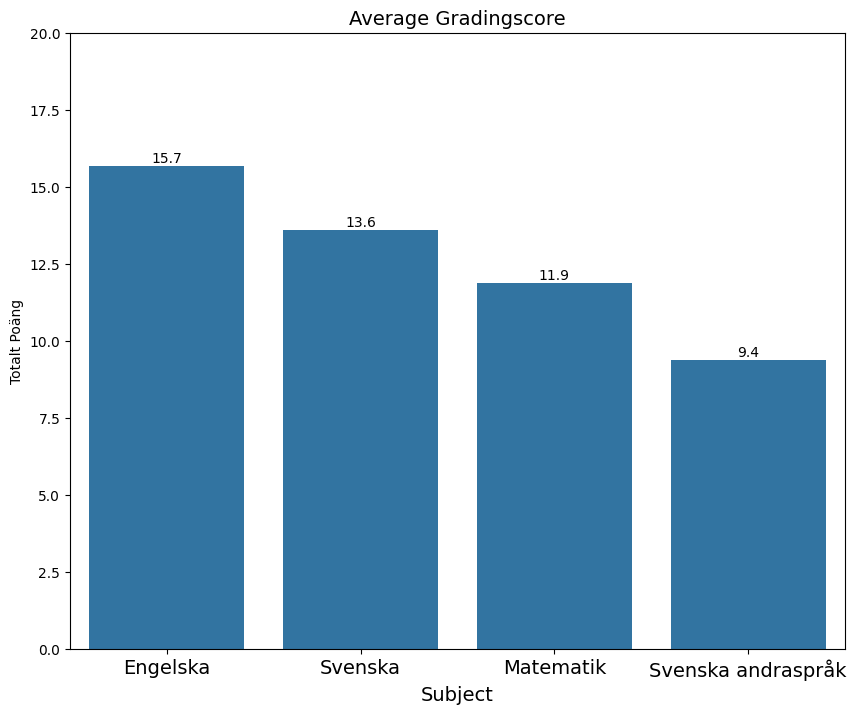

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Some basic descending list, will try to make it more fancy and the export it.

eng_score = dfR1_eng["Totalt (Poäng)"][0]
mat_score = dfR1_mat["Totalt (Poäng)"][0]
sve_score = dfR1_sve["Totalt (Poäng)"][0]
sve_andra_score = dfR1_sve_and["Totalt (Poäng)"][0]

scores_df = pd.DataFrame({
    "Subject": ["Engelska", "Matematik", "Svenska", "Svenska andraspråk"],
    "Totalt Poäng": [eng_score, mat_score, sve_score, sve_andra_score]
}) 

#lets sort it
scores_df_sorted = scores_df.sort_values(by="Totalt Poäng", ascending=False)

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x="Subject", y="Totalt Poäng",
                      data=scores_df_sorted)

#Lets add 20 as the max so its easier to read. Ugly 0 too much work to remove
plt.ylim(0, 20)
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=14)

#I wanted to get numbers above the staples as well.
for bar in barplot.patches:
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 round(bar.get_height(), 2), 
                 ha="center", va="bottom", fontsize=10, color="black")      #Code from ChatGPT

plt.title("Average Gradingscore" ,fontsize = 14)
plt.xlabel("Subject", fontsize= 14)
plt.ylabel("Totalt Poäng")

plt.savefig("Visualiseringar/average_gradingscore.png",
            dpi=300, bbox_inches="tight")

plt.show()

C:\Users\Delic\AppData\Local\Temp\ipykernel_3348\2459079702.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfR1_sve_and["Totalt (Poäng)"].fillna(0, inplace=True)


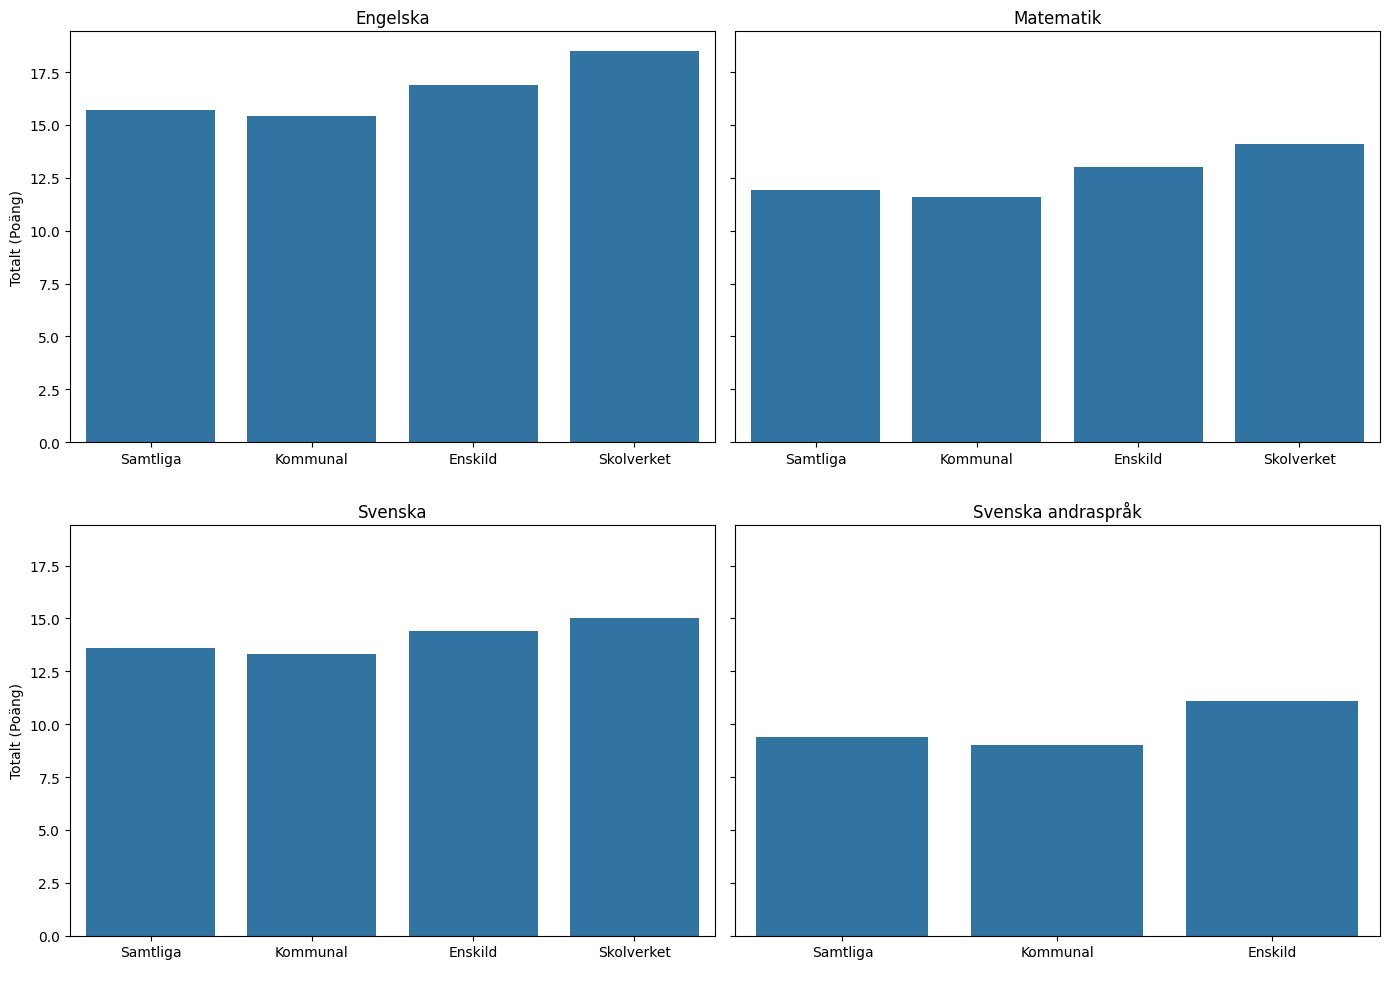

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Remove whitespace
dfR1_eng.columns = dfR1_eng.columns.str.strip()
dfR1_mat.columns = dfR1_mat.columns.str.strip()
dfR1_sve.columns = dfR1_sve.columns.str.strip()
dfR1_sve_and.columns = dfR1_sve_and.columns.str.strip()


dfR1_sve_and["Totalt (Poäng)"] = pd.to_numeric(
dfR1_sve_and["Totalt (Poäng)"], errors="coerce")


dfR1_sve_and["Totalt (Poäng)"].fillna(0, inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4)


sns.barplot(ax=axes[0], x=dfR1_eng["Huvudman"], y=dfR1_eng["Totalt (Poäng)"])
axes[0].set_title("Engelska")
axes[0].set_xlabel(" ")

sns.barplot(ax=axes[1], x=dfR1_mat["Huvudman"], y=dfR1_mat["Totalt (Poäng)"])
axes[1].set_title("Matematik")
axes[1].set_xlabel(" ")

sns.barplot(ax=axes[2], x=dfR1_sve["Huvudman"], y=dfR1_sve["Totalt (Poäng)"])
axes[2].set_title("Svenska")
axes[2].set_xlabel(" ")

sns.barplot(ax=axes[3], x=dfR1_sve_and[:-1]["Huvudman"],
            y=dfR1_sve_and[:-1]["Totalt (Poäng)"])
axes[3].set_title("Svenska andraspråk")
axes[3].set_xlabel(" ")
plt.savefig("Visualiseringar/SubPlots.png",
            dpi=300, bbox_inches="tight")

plt.tight_layout() 
plt.show()